# Estudio de las Ventas de una Ferretería
## NB2: EDA y Visualización de los Datos

>Autor: Diana Chacón Ocariz

### Contenido

1. [Introducción](#introduccion)
1. [Carga de Librerías](#carga-librerias)
1. [Carga de Datos](#carga-datos)
    1. [Datos Ventas](#datos-ventas)
    1. [Datos Stock](#datos-stock)
    1. [Datos Ventas Línea Producto y Stock](#datos-ventas-stock) 
1. [Funciones Generales](#funciones)
1. [Resumen General](#resumen-general-ventas)
1. [Ventas en USD](#ventas-usd)
    1. [Ventas Excepcionales](#ventas-excepcionales)
    1. [Ventas por Fecha](#ventas-fechas) 
        1. [Ventas por Día de la Semana](#ventas-dia-semana) 
        1. [Ventas por Día del Mes](#ventas-dia-mes) 
1. [Ventas por Línea de Producto](#ventas-linea)  
    1. [Líneas de Producto más Vendidas en USD y en Volumen](#linea-mas-vendidos)   
1. [Ventas por Producto](#ventas-producto)
    1. [Productos con Ventas Numerosas](#prod-ventas-numerosas)
    1. [Productos sin Ventas](#prod-sin-ventas)
    1. [Productos más Vendidos](#prod-mas-vendidos)
    1. [Productos Indispensables](#prod-indispensables)
    1. [Productos con Posibles Rotura Stock](#rotura-stock)   
1. [Afluencia de Clientes](#afluencia-cl)
    1. [Afluencia de Clientes por Día de la Semana](#afluencia-cl-dia)
    1. [Afluencia de Clientes por Hora](#afluencia-cl-hora)

## 1. Introducción<a name="introduccion"></a>

Se trata de una pequeña ferretería que maneja un poco más de 3.000 productos distintos. Poseen un software de gestión genérico que les provee una gran cantidad de reportes, básicamente tablas con números, díficiles de analizar (un reporte puede constar de varias decenas de páginas).

**Buscamos tener mayor visibilidad sobre las ventas para poder mejorar el proceso de compras y la toma de decisiones en general:** 

 - Analizar objetivamente las ventas.
 - Identificar los productos más y menos vendidos.
 - Determinar los productos que podrían entrar en rotura de stock al final del período.
 - Saber los momentos de mayor afluencia de clientes.
 - Conocer el mejor vendedor de cada mes.

### ¿Qué nos interesa de los datos?

3 variables nos interesan:
 - **cantidad:** Nos da el volumen de ventas (cantidad de productos vendidos).
 - **monto_dolar:** Nos da las ventas en USD.
 - **num:** Nos permite contar la cantidad de ventas o facturas. Puede dar una idea de la afluencia de clientes.

**Nota:** Este estudio también nos permitirá practicar diversas herramientas de visualización.

## 2. Carga de librerías<a name="carga-librerias"></a>

In [1]:
# Librerías utilizadas

# Librerías para el manejo de directorios
import os
import glob
from pathlib import Path

import numpy as np
import pandas as pd

# Librerías para graficar 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import squarify
from rich_dataframe import prettify

%matplotlib inline


## 3. Carga de Datos<a name="carga-datos"></a>

In [2]:
BASE_DIR = Path.cwd()
BASE_DIR

PosixPath('/home/diana/Documentos/Ciencia de Datos/Proyecto Ventas')

### 3.A Datos Ventas<a name="datos-ventas"></a>

**Metadatos ventas.parquet**

Recuperamos los datos (ya limpios) del rchivo **ventas.parquet**:

Cada fila del DF corresponde a un producto dentro de una factura (línea de factura):

    - num: Número o referencia de la factura          
    - fecha_comp: Fecha de la factura, en formato datetime
    - cliente: Código del cliente           
    - vendedor: Código del vendedor           
    - cod: Código del producto              
    - producto: Descripción del producto          
    - cantidad: Cantidad de producto dentro de la factura   
    - monto: Monto en Bs (moneda venezolana) del producto
    - tipo: Tipo de la factura              
    - fecha: Fecha de la factura en formato yyyy-mm-dd       
    - tasa_dolar: Tasa de cambio del día        
    - monto_dolar: Monto en USD del producto
    
**Nota:** Los datos del 2020 sólo corresponden al total de ventas (factura), no tenemos el detalle de los productos

In [3]:
%%time 
df_ventas = pd.read_parquet(f"{BASE_DIR / 'datos/out/ventas.parquet'}", engine='fastparquet')
df_ventas.sample(5)

CPU times: user 3.99 s, sys: 52.7 ms, total: 4.04 s
Wall time: 4.21 s


num          fecha_comp  vendedor       monto tipo  \
3615   2020-0000001559-ne 2020-09-17 08:09:00         7   773300.00   ne   
36028  2021-0000005497-ne 2021-12-14 11:06:00        13        9.60   ne   
19266  2021-0000003685-fa 2021-04-19 09:40:00        10       15.26   fa   
31724  2021-0000004520-fa 2021-05-18 15:10:00        13       48.72   fa   
9864   2020-0000003495-fa 2020-04-29 10:30:00        13  3151720.00   fa   

         cod                                         producto  cantidad  \
3615                                                                0.0   
36028  00655  PVC CODO 50MM/2" "TIPO A" AGUAS NEGRAS AMARILLO       2.0   
19266  00978                               LIMPOTEX 1LT HOGAR       2.0   
31724  02304                        LLAVE PLASTICA 1" ROSCADA       7.0   
9864                                                                0.0   

           fecha     tasa_dolar  monto_dolar  
3615  2020-09-17  360417.270000     2.145569  
36028 2021-12-14       4.690000     2.046908  
19266 2021-04-19       2.361318     6.462493  
31724 2021-05-18       2.846074    17.118321  
9864  2020-04-29  175700.680000    17.938007

In [4]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43487 entries, 0 to 43486
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   num          43487 non-null  object        
 1   fecha_comp   43487 non-null  datetime64[ns]
 2   vendedor     43487 non-null  int64         
 3   monto        43487 non-null  float64       
 4   tipo         43487 non-null  object        
 5   cod          43487 non-null  object        
 6   producto     43487 non-null  object        
 7   cantidad     43487 non-null  float64       
 8   fecha        43487 non-null  datetime64[ns]
 9   tasa_dolar   43487 non-null  float64       
 10  monto_dolar  43487 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 4.0+ MB


### 3.B Datos Stock<a name="datos-stock"></a>

**Metadatos stock.parquet**

Recuperamos los datos (ya limpios) del rchivo **stock.parquet**:

Cada fila del DF corresponde a un producto con su stock a una fecha dada:
         
    - cod: Código del producto              
    - producto: Descripción del producto          
    - linea: Línea o categoría del producto  
    - stock: Cantidad del producto en stock              
    - fecha_stock: Fecha del stock, en formato yyyy-mm-dd       

In [5]:
%%time 
df_stock = pd.read_parquet(f"{BASE_DIR / 'datos/out/stock.parquet'}", engine='fastparquet')
df_stock.sample(5)

CPU times: user 10.2 ms, sys: 3.9 ms, total: 14.1 ms
Wall time: 14.2 ms


cod                                           producto  \
3211  05457                   TAPA HEMBRA 1 1/2" PLASTICA GRIS   
420   00433                               CABO PARA ESCARDILLA   
2734  04820   BASE DOBLE REFLECTOR PAR 38 GRIS FERMETAL BAS-52   
3214  05460                        R. MANILLA METALICA POMO FP   
527   00542  MANGUERA TUBO PEAD 125MM/5" PN10 (150 PSI) GEM...   

                                                linea  stock fecha_stock  
3211  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   28.0  2022-03-03  
420                                       NO ASIGNADO    0.0  2022-03-03  
2734                                     ELECTRICIDAD    2.0  2022-03-03  
3214                                 GRIFERIA GENERAL    5.0  2022-03-03  
527           MANGUERAS DE RIEGO DE POLIETILENO NEGRA    0.0  2022-03-03

### 3.C Datos Ventas Línea Producto y Stock<a name="datos-ventas-stock"></a>

Vamos a unir los datos de las Ventas con los del Stock.

Para eso, seleccionamos sólo las ventas a partir le **2021-01-01** ya que para el año 2020 no tenemos el detalle de las ventas. 

Luego, hacemos un merge utilizando el código y la descripción del producto presentes en ambos DF. Hacemos una unión de tipo *Outer* ya que pueden existir productos que no tuvieron ventas y nos interesa tenerlos todos.

In [6]:
# Solo tenemos detalles de ventas a partir de 2021

df_ventas_linea_prod = df_ventas.query('fecha > "2020-12-31"').loc[:,['fecha', 'cod', 'producto', 'cantidad', 'monto_dolar']]
df_ventas_linea_prod.sample(5)

fecha    cod                                         producto  \
27310 2021-03-31  04599                                                0   
29850 2021-03-30  04289  CEPILLO DE ALAMBRE 250MM MANGO ANARANJADO INGCO   
17265 2021-02-17  04846      RIEGO ABRAZADERA PLASTICA 40MM * 1" AGRO/FP   
18847 2021-03-11  04129           CONFITERIA CARAMELO CHAO/ LOKIÑO/ MIST   
16835 2022-02-09  04123                      PINTURA CUÑETE BLANCO OSTRA   

       cantidad  monto_dolar  
27310       1.0     5.618224  
29850       1.0     1.451346  
17265       1.0     2.319743  
18847       4.0     0.109620  
16835       1.0     2.527233

In [7]:
df_ventas_linea_prod = pd.merge(df_ventas_linea_prod, df_stock, on=['cod', 'producto'], how='outer')
df_ventas_linea_prod

fecha    cod                                           producto  \
0     2022-01-03  00001    PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
1     2022-01-03  00001    PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
2     2022-01-12  00001    PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
3     2022-01-13  00001    PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
4     2022-01-17  00001    PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
...          ...    ...                                                ...   
33714        NaT  06360                    BOTAS #43 DE CAUCHO VENUS NEGRA   
33715        NaT  06367    LLAVE 1/4" ESFERICA BRONCE MACHO/HEMBRA GRINACA   
33716        NaT  06371        R. VALVULA ENSAMBLADA PARA MOTOR DE FUMIGAR   
33717        NaT  06384               HIDROJET DE ALTA PRESION 1400W INGCO   
33718        NaT  06386  VALVULA 3/4" CHECK VERTICAL CANASTILLA DE BRON...   

       cantidad  monto_dolar                        linea  stock fecha_stock  
0           1.0     1.842217                    GENERALES   15.5  2022-03-03  
1           1.0     2.136461                    GENERALES   15.5  2022-03-03  
2           1.0     2.183168                    GENERALES   15.5  2022-03-03  
3           1.0     1.822314                    GENERALES   15.5  2022-03-03  
4           1.0     1.811088                    GENERALES   15.5  2022-03-03  
...         ...          ...                          ...    ...         ...  
33714       NaN          NaN          SEGURIDAD & HIGIENE    3.0  2022-03-03  
33715       NaN          NaN  LLAVES O VALVULAS METALICAS    3.0  2022-03-03  
33716       NaN          NaN                    GENERALES    6.0  2022-03-03  
33717       NaN          NaN                    GENERALES    1.0  2022-03-03  
33718       NaN          NaN  LLAVES O VALVULAS METALICAS    6.0  2022-03-03  

[33719 rows x 8 columns]

## 4. Funciones Generales<a name="funciones"></a>

In [8]:
# Estilo y colores para los gráficos

plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth'] = 1.5

VERDE = '#39894d' 
AZUL = '#2649e8'  
AMARILLO = '#f1d065' 

# Definir colores específicos para cada año
AÑOS = ['2020', '2021', '2022']
COLORES = [VERDE, AZUL, AMARILLO]

In [9]:
# Funciones generales

# Formateado de texto
def formato_titulo(texto):
    subray = '=' * (len(texto))
    print("\033[1;32m"+texto)
    print(subray)
    print("\033[0;m")

In [10]:
# Funciones para crear gráficos de Altair


# graf_barras_ventas_dol
# Crea un gráfico de barras de ventas en $ en función de diferentes
# intervalos de tiempo
#
# Parámetros: 
#     df: DataFrame a utilizar
#     x: Datos para el eje de las x. Generalmente es el intervalo de tiempo
#     tooltip: Lista con los parámetros del tooltip
#     titulo: Título del gráfico
#     dx: Entero para ajustar horizontalmente la posición del texto sobre las barras
def graf_barras_ventas_dol(df, x, tooltip, titulo, dx):
    
       
    barras = alt.Chart(df).mark_bar().encode(
                    x=x,
                    y=alt.Y('sum(monto_dolar):Q', title = 'Ventas en $', scale=alt.Scale(zero=False), 
                      axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10)),
                    color=alt.Color(
                        'sum(monto_dolar):Q', scale=alt.Scale(scheme='goldgreen'),
                        legend=alt.Legend(title="Ventas en $")),
                    tooltip=tooltip,
                    ).properties(title=titulo,
                             width=800, 
                             height=300
                    )
    
    textos = barras.mark_text(dx=dx, dy=-10, fill='black').encode(
             text = alt.Text('sum(monto_dolar):Q', format=',.5', title = 'Ventas en $')
                    )
        
    grafico_final = barras + textos
    
    return grafico_final

# graf_sectores_linea
# Crea un gráfico de sectores de las líneas de productos
#
# Parámetros: 
#     df: DataFrame a utilizar
#     theta: Datos que se van a graficar
#     texto: Texto que se mostrará en el cada sector del gráfico
#     titulo: Título del gráfico
def graf_sectores_linea(df, theta, texto, titulo):

    base = alt.Chart(df).encode(
        theta=theta, 
        color=alt.Color("linea:N", scale=alt.Scale(scheme='category20b')),
        tooltip=[alt.Tooltip('linea:N', title='Línea de Producto'),
                 alt.Tooltip('sum(monto_dolar):Q', format='$,.5', title='Ventas en $'),
                 alt.Tooltip('sum(cantidad):Q', format=',.5', title='Volumen de Ventas')]
    ).properties(title=titulo)

    pie = base.mark_arc(outerRadius=130, innerRadius=40)

    text = base.mark_text(radius=110, size=10, fill='black').encode(
           text=texto
           )
    
    grafico = pie + text

    return grafico

## 5. Resumen General<a name="resumen-general-ventas"></a>

Una visión general de los datos, de las 3 variables que nos interesan:

    - Ventas en USD (monto_dolar)
    - Volumen de Ventas (cantidad). Esta métrica sólo está disponible a partir del 01/01/2021
    - N° de Facturas (num)

In [11]:
df_ventas.describe()

vendedor         monto      cantidad    tasa_dolar   monto_dolar
count  43487.000000  4.348700e+04  43487.000000  4.348700e+04  43487.000000
mean       9.483271  1.232918e+06      3.353871  8.226402e+04      9.936964
std        3.436869  1.331717e+07     18.182985  2.041722e+05     51.203886
min        1.000000  1.000000e-02      0.000000  1.178317e+00      0.000317
25%        7.000000  4.290000e+00      0.000000  2.970933e+00      1.093596
50%       10.000000  1.596000e+01      1.000000  4.280000e+00      2.958608
75%       13.000000  1.633280e+04      2.000000  6.294100e+04      7.576221
max       14.000000  1.321200e+09   2000.000000  1.088309e+06   5686.278600

In [12]:
# Métricas por día

df_ventas_fecha = df_ventas.pivot_table(index='fecha',
                                       aggfunc={'monto_dolar': sum, 
                                                'cantidad': sum,
                                                'num': 'nunique'})
df_ventas_fecha.sample(5)

cantidad  monto_dolar  num
fecha                                 
2021-05-28    550.65   435.972791   32
2021-12-10    738.99  1396.698514   54
2020-10-05      0.00   938.159789   55
2021-04-30    408.50  1222.950739   47
2021-09-28    185.50   855.462810   38

In [13]:
df_ventas_dol = df_ventas.groupby('fecha').monto_dolar.sum().reset_index()
df_ventas_dol.sample(5)

fecha  monto_dolar
371 2021-05-13   372.395232
259 2020-12-21   652.656361
526 2021-11-15  1412.320796
521 2021-11-09   231.404018
559 2021-12-23   200.753813

In [14]:
# Resumen General de las Ventas en $

total_dias = df_ventas_dol.fecha.nunique()
num_meses = df_ventas_dol.fecha.dt.strftime('%m-%Y').nunique()

max_ventas = df_ventas.monto_dolar.max()
total_ventas_dol = df_ventas_dol.monto_dolar.sum()
total_faturas = df_ventas_fecha.num.sum()
promedio_diario =  total_ventas_dol / total_dias
promedio_mensual = total_ventas_dol / num_meses

formato_titulo('Resumen General de las Ventas en $')
print('El período de estudio va de:', df_ventas_dol.fecha.min(), 'a', df_ventas_dol.fecha.max())
print('El total de ventas en $ del período es:', round(total_ventas_dol, 2))
print('El N° de Facturas emitidas durante el período es:', round(total_faturas, 2))
print('En promedio se emiten {} facturas diariamente'.format(round(total_faturas/total_dias, 2)))
print('El promedio mensual de ventas en $ es:', round(promedio_mensual, 2))
print('El promedio diario de ventas en $ es:', round(promedio_diario, 2))
print('El monto máximo de una venta en $ es:', round(max_ventas, 2), 'y es la siguiente:')

prettify(df_ventas.query('monto_dolar == monto_dolar.max() '), row_limit=1, col_limit=3, delay_time=1)

print('El día que más se ha vendido en el período ha sido:')
prettify(df_ventas_dol.query('monto_dolar == monto_dolar.max() '), row_limit=1, col_limit=3, delay_time=1)

Resumen General de las Ventas en $

El período de estudio va de: 2020-01-06 00:00:00 a 2022-02-26 00:00:00
El total de ventas en $ del período es: 432128.73
El N° de Facturas emitidas durante el período es: 25880
En promedio se emiten 42.29 facturas diariamente
El promedio mensual de ventas en $ es: 16620.34
El promedio diario de ventas en $ es: 706.09
El monto máximo de una venta en $ es: 5686.28 y es la siguiente:


Output()

El día que más se ha vendido en el período ha sido:


Output()

#### Métricas por día

Text(0.5, 0, 'Fecha')

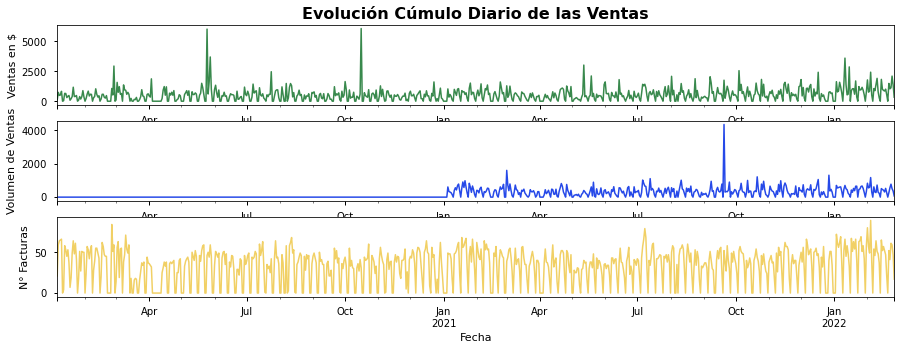

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,5))

df_ventas_fecha.monto_dolar.resample('D').sum().plot(ax=ax1, color=VERDE)
df_ventas_fecha.cantidad.resample('D').sum().plot(ax=ax2, color=AZUL)
df_ventas_fecha.num.resample('D').sum().plot(ax=ax3, color=AMARILLO)
ax1.set_title('Evolución Cúmulo Diario de las Ventas', fontsize=16, weight='bold')
ax1.set_ylabel('Ventas en $')
ax2.set_ylabel('Volumen de Ventas')
ax3.set_ylabel('N° Facturas')
ax3.set_xlabel('Fecha')

No observamos, a primera vista, ningún patrón en el comportamiento de niguna de las variables que nos interesan. Tampoco existe una correlación siginificativa entre ellas. Solo es significativo su evolución en el tiempo.

#### Ventas en USD
1. Los picos en las ventas en USD se deben a ventas excepcionales, como veremos más adelante
1. En general,durante el 2020 las ventas fueron más bajas, seguramente debido a efectos de la pandemia: Días donde no hubo ventas, restricciones en los horarios, baja del poder acquisitivo de las personas, etc.
1. A partir del 2021, las ventas mejoran, sobre todo a partir del 2do semestre
1. En lo que va del 2022, observamos un ligero aumento de las ventas

#### Volumen de Ventas
1. Contamos nada más con los datos a partir del 2021
1. Solo solo observamos un pico significativo en setptiembe 2021 pero que no se refleja en las ventas en USD. Esto se explica porque algunos productos se venden en cantidades (clavos, tornillos, electrodos de soldadura, metros de cable, ect) pero el monto en moneda no es significativo
1. Por el contrario, hay otros productos (como herramientas eléctricas, mangueras para sistemas de riego, motores para fumigar, etc) que una unidad representa un monto elevado

#### N° de Facturas
1. Esta métrica nos puede dar una idea de la afluencia de clientes o del número de ventas
1. Observamos ligeros aumentos los primeros meses del año (enero y febrero)
1. De nuevo, entre mediados de marzo y mediados de abril 2020, observamos una caida en el número de ventas debido a las restricciones por la pandemia

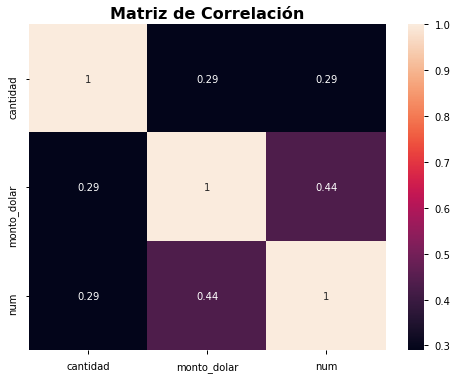

In [16]:
corr_df = df_ventas_fecha.corr(method='pearson')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
ax.set_title('Matriz de Correlación', fontsize=16, weight='bold')
plt.show()

No observamos correlación entre las variables.

In [17]:
# Creamos una columna index para poder hacer un gráfico de regresión y ver la tendencia de las ventas diarias
df_ventas_dol_reg = df_ventas_fecha.monto_dolar.resample('D').sum().reset_index().reset_index()
df_ventas_dol_reg.sample(5)

index      fecha  monto_dolar
127    127 2020-05-12   553.226245
761    761 2022-02-05   520.167391
576    576 2021-08-04   908.458977
306    306 2020-11-07     0.000000
477    477 2021-04-27   874.563691

Text(0.5, 0, 'N° Días')

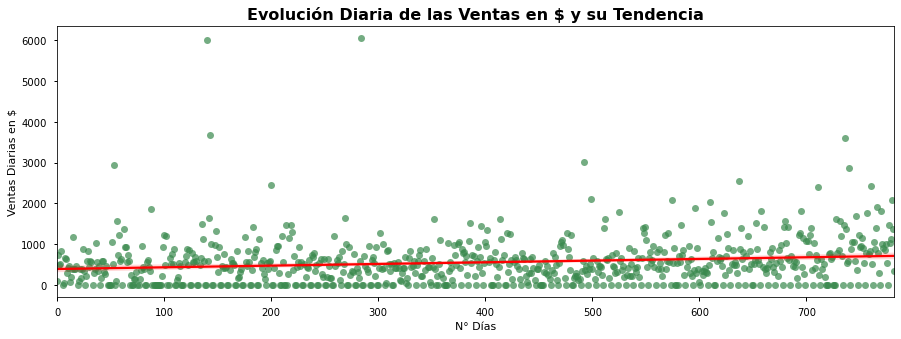

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.regplot(
    x='index',
    y='monto_dolar',
    data=df_ventas_dol_reg,
    scatter_kws={'color': VERDE, 'alpha': 0.7},
    line_kws={'color': 'red'},
)
ax.set_title(
    'Evolución Diaria de las Ventas en $ y su Tendencia',
    fontsize=16,
    weight='bold',
)
ax.set_ylabel('Ventas Diarias en $')
ax.set_xlabel('N° Días')

Existe una ligera tendencia creciente de las Ventas en $

## 6. Ventas en USD<a name="ventas-usd"></a>

### 6.A Ventas Excepcionales<a name="ventas-excepcionales"></a>

Las **Ventas Excepcionales** son aquellas cuyos montos son excepcionalmente elevados. Son ventas reales, por lo tanto no pueden ser descartadas completamente.

Estudiarlas, equivale a estudiar los valores extremos o **outliers**.

In [19]:
# Calculamos el monto total por factura

df_total_factura = df_ventas.groupby('num').monto_dolar.sum()
df_total_factura = df_total_factura.reset_index()
df_total_factura.describe()

monto_dolar
count  25878.000000
mean      16.698691
std       71.286925
min        0.000317
25%        1.925561
50%        4.985491
75%       12.777997
max     5686.278600

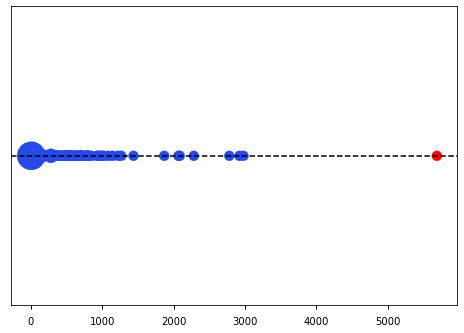

In [20]:
montos = np.array(df_total_factura.monto_dolar)
montos_unicos, counts = np.unique(montos, return_counts=True)
 
sizes = counts*100
colores = [AZUL]*len(montos_unicos)
colores[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(montos_unicos, np.ones(len(montos_unicos)), s=sizes, color=colores)
plt.yticks([])
plt.show()

El punto rojo señala la venta más elevada del período y que sobrepasa los 5.000 USD. La mayoría de las ventas se sitúan por debajo de los 1.000 USD. Hay algunas entre los 1.000 y 2.000 y un pequeño grupo ligeramente inferiores a los 3.000 USD

<AxesSubplot:xlabel='monto_dolar', ylabel='Density'>

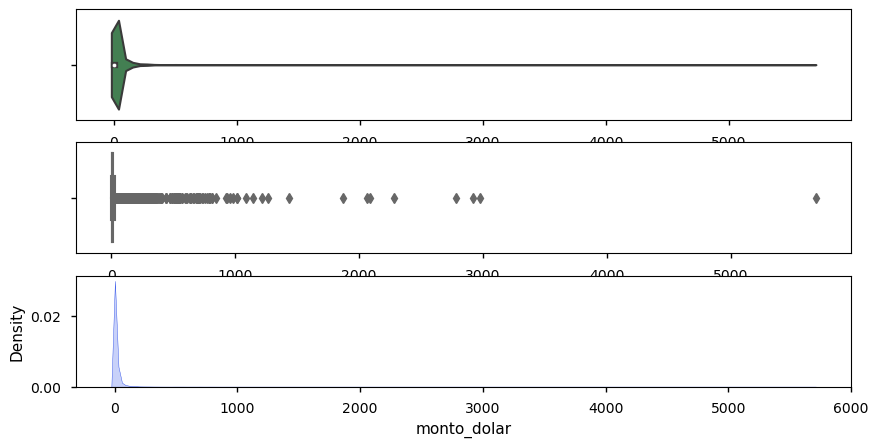

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=100, figsize=(10,5))

sns.violinplot(x='monto_dolar', data=df_total_factura, color=VERDE, ax=ax1)
sns.boxplot(x='monto_dolar', data=df_total_factura, color=AMARILLO, ax=ax2)
sns.kdeplot(x='monto_dolar', data=df_total_factura, color=AZUL, shade=True, ax=ax3)

In [22]:
df_total_factura_max = df_total_factura.query('monto_dolar > 1000.0')
df_total_factura_max.describe()

monto_dolar
count    15.000000
mean   2055.794947
std    1225.904000
min    1015.451327
25%    1180.511252
50%    1866.830040
75%    2529.610593
max    5686.278600

1. El 75% de las ventas no sobrepasa los 13 USD
2. Observamos un grupo que va hasta los 1.000 USD, luego dos pequeños grupos al rededor de los 2.000 USD y 3.000 USD
3. Hay un caso extremo que sobrepasa los 5.680 USD
4. Hay apenas 15 ventas con montos mayores a 1.000 USD, lo que equivale a 0,06% de las ventas. Haremos comparaciones entre los datos completos y los datos sin las ventas mayores a 1.000 USD

In [23]:
df_ventas_sin_excep = df_ventas[~df_ventas.num.isin(df_total_factura_max.num)].loc[:,['fecha', 'monto_dolar']]
df_ventas_sin_excep = df_ventas_sin_excep.groupby('fecha').monto_dolar.sum().reset_index()
df_ventas_sin_excep.sample(5)

fecha  monto_dolar
262 2020-12-24   384.893750
503 2021-10-19   606.253659
80  2020-04-24   885.166617
305 2021-02-19   501.910252
59  2020-03-19   133.783546

In [24]:
df_ventas_comparacion = pd.merge(df_ventas_dol, df_ventas_sin_excep, on='fecha')
df_ventas_comparacion.columns=['fecha', 'monto_dolar', 'monto_sin_ex']
df_ventas_comparacion = df_ventas_comparacion.set_index('fecha')
df_ventas_comparacion.sample(5)

monto_dolar  monto_sin_ex
fecha                                
2020-02-17   575.799312    575.799312
2021-03-05   606.867712    606.867712
2020-07-31   298.275600    298.275600
2020-03-23   146.734940    146.734940
2020-01-16   412.764882    412.764882

In [25]:
df_ventas_compar_graf = df_ventas_comparacion.reset_index()

base = alt.Chart(df_ventas_compar_graf).mark_area().encode(
    x=alt.X('yearmonth(fecha):T', title='Fecha', axis = alt.Axis(labelAngle=0, labelFontSize=14))
).properties(
    title = 'Comparación Ventas en $ Totales y Sin Excepcionales',
    width = 750,
    height=300
)

todas = base.mark_area(
    line={'color':'darkgreen'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkgreen', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0)
    ).encode(
    y=alt.Y('sum(monto_dolar):Q', title = 'Ventas en $', scale=alt.Scale(zero=False), 
                      axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10))
)

sin_excep = base.mark_area(
    line={'color':'darkblue'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkblue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0)
    ).encode(
    y=alt.Y('sum(monto_sin_ex):Q', title='')
)



todas + sin_excep



alt.LayerChart(...)

In [26]:
df_ventas_comparacion.reset_index(inplace=True)

In [27]:
# Comparación total de ventas por año tomando en cuenta o no las ventas excepcionales

df_comparacion_año = df_ventas_comparacion.pivot_table(index=df_ventas_comparacion.fecha.dt.year,
                            aggfunc={'monto_dolar': sum, 'monto_sin_ex': sum})
df_comparacion_año['diferencia'] = df_comparacion_año.monto_dolar - df_comparacion_año.monto_sin_ex
df_comparacion_año.columns = ['Todas las Ventas', 'Sin Excepcionales', 'Diferencia']

formato_titulo('Comparación Anual del Total de Ventas en $ con y sin las Ventas Excepcionales')
prettify(df_comparacion_año, row_limit=5, col_limit=4, delay_time=1)


Comparación Anual del Total de Ventas en $ con y sin las Ventas Excepcionales



Output()

Las principales **Ventas Excepcionales** se produjeron en el 2020. Su incidencia es bastante significativa, ya que en general durante ese año, las ventas fueron menores que a partir del 2021.

A partir del 2021, las **Ventas Excepcionales** han sido menos elevedas en monto y su incidencia global es menor.

### 6.B Ventas por Fecha<a name="ventas-fecha"></a>

In [28]:
# Calculamos diferentes partes de la fecha

df_ventas_dol['año'] = df_ventas_dol.fecha.dt.year
df_ventas_dol['mes_año'] = df_ventas_dol.fecha.dt.strftime('%m-%Y')
df_ventas_dol['dia_semana'] = df_ventas_dol.fecha.dt.weekday
df_ventas_dol['dia_mes'] = df_ventas_dol.fecha.dt.day
df_ventas_dol.sample(5)

fecha  monto_dolar   año  mes_año  dia_semana  dia_mes
279 2021-01-18   881.341582  2021  01-2021           0       18
124 2020-06-26   392.866945  2020  06-2020           4       26
154 2020-08-09   276.899321  2020  08-2020           6        9
67  2020-03-31   616.179035  2020  03-2020           1       31
468 2021-09-06   493.153545  2021  09-2021           0        6

In [29]:
x=alt.X('yearmonth(fecha):T', title='Mes y Año', axis = alt.Axis(labelAngle=0, labelFontSize=14))
tooltip=[alt.Tooltip('yearmonth(fecha):T', title='Mes y Año'),
         alt.Tooltip('sum(monto_dolar):Q', title='Ventas en $', format='$,.5')]
titulo='Ventas en $ por Mes'

graf_barras_ventas_dol(df_ventas_dol, x, tooltip, titulo, 15)

alt.LayerChart(...)

1. Confirmamos que las ventas en USD durante 2020 en general fueron las más bajas del período. Los picos que se observan en ese año son debidos a ventas excepcionales. Esto puede explicarse en buena parte a la pandemia, como veremos más adelante.
2. En 2021 las ventas aumentan, en particular a partir del 2do semestre. También podría explicarse por la disminución en las restricciones por la pandemia.
3. 2022 comienza bastante bien con 2 meses registrando las ventas más elevadas del período.

#### 6.B.a Ventas por Día de la Semana<a name="ventas-dia-semana"></a>

In [30]:
# Total de ventas por día de la semana de cada mes

df_ventas_dia_semana = df_ventas_dol.pivot_table(index=df_ventas_dol.mes_año,
                                            columns=df_ventas_dol.dia_semana, aggfunc={'monto_dolar': sum},
                                            fill_value=0)
df_ventas_dia_semana.columns = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']
df_ventas_dia_semana

Lun          Mar          Mie          Jue          Vie  \
mes_año                                                                    
01-2020  1531.657232  2730.974894  1557.202647  2207.919301  2123.907868   
01-2021  2950.556683  4039.964339  2166.060704  2864.239439  2884.332234   
01-2022  5993.008193  6345.862615  4211.000312  3849.191008  4383.430025   
02-2020  1563.447720  2453.311830  2397.020698  1701.697084  4424.442111   
02-2021  1559.886233  3585.569561  3141.892730  3451.844984  3229.538314   
02-2022  4354.673485  4685.985489  4181.568520  5679.147656  5564.711846   
03-2020  3220.645464  2652.192226  2903.512438  1892.565451  1937.839969   
03-2021  3298.064658  2713.807813  2568.880136  2812.007238  1635.795558   
04-2020  1027.444224  1645.236462  2942.525720  1801.916525  3949.732841   
04-2021  2468.683163  3202.946005  2310.648747  2619.331624  2941.064728   
05-2020  7854.959273  2528.419154  4570.174850  5999.999829  3050.882230   
05-2021  2883.251353  1626.363609  5894.606022  1447.094554  1673.973381   
06-2020  3833.685642  3105.616794  2177.094470  1602.669703  2273.071456   
06-2021  3612.375030  3481.414043  2961.057943  1507.987450  2389.329167   
07-2020  2431.498008  3196.185788  3088.079515  3774.515277  4449.881610   
07-2021  2942.644847  3828.785077  3079.710761  3582.390103  4408.330709   
08-2020  4043.862722  2774.204571  2655.105064  1249.315214  3383.577080   
08-2021  3938.888904  3817.415182  3628.801368  1926.945845  1883.957056   
09-2020  2785.093720  2772.080027  2630.947624  1229.478122  1975.287385   
09-2021  3341.969818  4281.933775  3764.275245  3488.371117  2681.302988   
10-2020  2679.719593  1720.262033  1439.657625  3107.864567  9712.804210   
10-2021  5572.556618  3122.798839  4719.426861  2731.650867  2721.634103   
11-2020  2747.359079  2988.822244  1737.501192  2559.723768  1395.196235   
11-2021  4379.532099  4331.640255  3098.016685  2598.875623  3435.663573   
12-2020  2234.683248  3309.964875  3937.292916  2323.513895  1245.458278   
12-2021  3477.849793  2700.962950  4476.155053  3176.981472  4952.909467   

                 Sab          Dom  
mes_año                            
01-2020    82.358816   333.857234  
01-2021   996.294727     0.000000  
01-2022  4456.175386     0.000000  
02-2020     0.000000   697.923364  
02-2021  1140.054082     0.000000  
02-2022  1679.668989     0.000000  
03-2020     0.000000  1693.889650  
03-2021   480.829274     0.000000  
04-2020     0.000000     0.000000  
04-2021   437.554386     0.000000  
05-2020     0.000000     0.000000  
05-2021   801.505309     0.000000  
06-2020     0.000000     0.000000  
06-2021   920.295099     0.000000  
07-2020   154.672530     0.000000  
07-2021  1855.761776     0.000000  
08-2020     7.996093   276.899321  
08-2021  1078.645626     0.000000  
09-2020   122.196078     0.000000  
09-2021  1117.952683     0.000000  
10-2020     0.000000     0.000000  
10-2021  1649.615102     0.000000  
11-2020   290.431152   131.577089  
11-2021  1548.805023     0.000000  
12-2020   777.747714     0.000000  
12-2021   891.800771     0.000000

In [31]:
mapa = alt.Chart(df_ventas_dol).mark_rect().encode(
                x=alt.X('day(fecha):T', title='Días de la Semana', axis = alt.Axis(labelAngle=0, labelFontSize=14)),
                y=alt.Y('yearmonth(fecha):T', title = 'Ventas en $', scale=alt.Scale(zero=False), 
                  axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10)),
                color=alt.Color('sum(monto_dolar):Q', scale=alt.Scale(scheme='goldgreen'), legend=alt.Legend(title="Ventas en $")),
                tooltip=[
                    alt.Tooltip('day(fecha):T', title='Día'),
                    alt.Tooltip('yearmonth(fecha):T', title='Mes y Año'),
                    alt.Tooltip('sum(monto_dolar):Q', format=',.5', title='Ventas en $')]
                ).properties(title='Ventas en $ por Día de la Semana',
                             width=600, 
                             height=300
                ).configure_title(
                    fontSize = 16,
                    anchor = 'middle',
                ).interactive()

mapa



alt.Chart(...)

In [32]:
x=alt.X('day(fecha):T', title='Días de la Semana', axis = alt.Axis(labelAngle=0, labelFontSize=14))
tooltip=[alt.Tooltip('day(fecha):T', title='Día'),
         alt.Tooltip('sum(monto_dolar):Q', title='Ventas en $', format='$,.5')]
titulo='Ventas en $ por Día de la Semana'

graf_barras_ventas_dol(df_ventas_dol, x, tooltip, titulo, 60)


alt.LayerChart(...)

Los lunes y viernes son los días donde observamos mayores ventas. Los sábados es normal tener menos ventas porque sólo se trabaja medio día. Curiosamente el jueves es un día con pocas ventas.

#### 6.B.b Ventas por Día del Mes<a name="ventas-dia-mes"></a>

In [33]:
df_ventas_dia_mes = df_ventas_dol.pivot_table(index=df_ventas_dol.mes_año,
                                            columns=df_ventas_dol.dia_mes, aggfunc={'monto_dolar': sum},
                                            fill_value=0)
df_ventas_dia_mes

monto_dolar                                                      \
dia_mes           1            2            3            4            5    
mes_año                                                                    
01-2020     0.000000     0.000000     0.000000     0.000000     0.000000   
01-2021     0.000000     0.000000     0.000000     0.000000  1025.174371   
01-2022     0.000000     0.000000  1628.923241   773.260504   854.500000   
02-2020     0.000000   228.427405   591.898212   840.911939   434.875294   
02-2021   597.742987   928.112308   448.788414   676.658349  1448.390864   
02-2022  1775.049041   757.390192   831.203863  2420.160870   520.167391   
03-2020   102.471183  1569.100584   740.156960  1213.586690   581.002611   
03-2021  1282.797023   327.117997   521.856075  1258.638821   606.867712   
04-2020   429.947573   343.727378  1865.040038     0.000000     0.000000   
04-2021     0.000000     0.000000     0.000000     0.000000   310.550924   
05-2020     0.000000     0.000000     0.000000   559.629421   708.440722   
05-2021     0.000000     0.000000   179.121985   229.004501   303.164561   
06-2020   984.311972  1332.024144   696.307495   323.136042   935.775980   
06-2021  1610.459773   645.720572   618.434072   660.443987   176.276599   
07-2020   460.703161   830.441806   554.543131     0.000000     0.000000   
07-2021   449.820795   670.552823   205.902734     0.000000   665.648431   
08-2020     0.000000     0.000000  1197.170954   556.828608     0.000000   
08-2021     0.000000  2076.398369   532.983106   908.458977     0.000000   
09-2020   696.059023   780.140801   336.050436   478.429830     0.000000   
09-2021   351.150160   407.752358   306.196339   286.529001     0.000000   
10-2020  1637.070887  1010.448421     0.000000     0.000000   938.159789   
10-2021   489.654244   302.497817     0.000000  2547.654501   889.681818   
11-2020     0.000000   421.493914  1279.945126   393.706990   992.169576   
11-2021   511.719101   795.961538   634.821670   915.937639   444.185268   
12-2020   834.225726   450.752098   456.728855   577.661259   289.318192   
12-2021  1804.950207   437.373695  1142.676471   262.088050     0.000000   

                                                                          ...  \
dia_mes           6            7            8            9            10  ...   
mes_año                                                                   ...   
01-2020   104.610817   739.473869   485.385935   515.495960   823.755195  ...   
01-2021   338.556452   559.099981   406.877705   113.560197     0.000000  ...   
01-2022  1579.416327  1191.730392   698.201474     0.000000  1482.000000  ...   
02-2020   582.694724   568.515668     0.000000   288.046326   395.750196  ...   
02-2021   285.706649     0.000000   528.333392  1052.128996   945.011517  ...   
02-2022     0.000000  1052.950108   879.565217  1401.104575  1905.677560  ...   
03-2020   646.227529     0.000000  1359.571616   940.063855   918.230849  ...   
03-2021   138.317334     0.000000   566.644612   696.262891   616.013044  ...   
04-2020     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
04-2021   577.616637   288.305906   468.976941   244.816049   144.322024  ...   
05-2020   878.469839   492.796971   864.247780     0.000000     0.000000  ...   
05-2021   229.910797   125.169426   138.451233     0.000000   337.713740  ...   
06-2020     0.000000     0.000000   462.697836   422.152875   749.672755  ...   
06-2021     0.000000   732.745323   457.801844   438.424317   296.985811  ...   
07-2020   357.390229  1427.228788   680.721010   798.203946   871.979596  ...   
07-2021  1407.765877  1281.355950  1413.361915  1104.303772   448.666178  ...   
08-2020     0.000000  1479.949875     0.000000   276.899321  1156.194226  ...   
08-2021     0.000000   536.191117     0.000000   720.760998   567.037550  ...   
09-2020     0.000000   543.376057   648.269859   256.875271   204.540011  ...   
09-2021   493.153545  

In [34]:
mapa = alt.Chart(df_ventas_dol).mark_rect().encode(
                x=alt.X('dia_mes:O', title='Días del mes', axis = alt.Axis(labelAngle=0, labelFontSize=14)),
                y=alt.Y('yearmonth(fecha):T', title = 'Mes y Año', scale=alt.Scale(zero=False), 
                  axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10)),
                color=alt.Color(
                    'sum(monto_dolar):Q', scale=alt.Scale(scheme='goldgreen'), legend=alt.Legend(title="Ventas en $")),
                tooltip=[
                    alt.Tooltip('dia_mes:O', title='Día'),
                    alt.Tooltip('yearmonth(fecha):T', title='Mes y Año'),
                    alt.Tooltip('sum(monto_dolar):Q', format=',.5', title='Ventas en $')]
                ).properties(title='Ventas en $ por Día del Mes',
                             width=800, 
                             height=300
                ).configure_title(
                    fontSize = 16,
                    anchor = 'middle',
                ).interactive()

mapa

alt.Chart(...)

Cada cuadrito corresponde a un día de venta en USD. Mientras más oscuro/verde, mayor las ventas. Los días en blanco corresponden a días sin ventas (fines de semana, feriados, etc.).

Las bajas ventas los primeros meses del 2020 se explican por los numerosos días sin ventas, debidos a la pandemia y feriados como el carnaval y semana santa.

Los cuadros más oscuro corresponden al 25/05/2020 y el 16/10/2020 donde se registraron ventas excepcionales.

A partir de julio del 2021 comenzamos a ver un poco más de cuadros oscuros, es decir, un aumento en las ventas.

En 2020 podemos observar mayores ventas en la 2da quincena de los meses. Pero a partir de julio del 2021, las ventes se vuelven más uniformes a lo largo de todo el mes.

In [35]:
x=alt.X('dia_mes:O', title='Días de la Semana', axis = alt.Axis(labelAngle=0, labelFontSize=14))
tooltip=[alt.Tooltip('dia_mes:O', title='Día'),
         alt.Tooltip('sum(monto_dolar):Q', title='Ventas en $', format='$,.5')]
titulo='Ventas en $ por Día del Mes'

graf_barras_ventas_dol(df_ventas_dol, x, tooltip, titulo, 1)

alt.LayerChart(...)

## 7. Ventas por Línea de Producto<a name="ventas-linea"></a>

In [36]:
df_linea = df_ventas_linea_prod.copy()
df_linea.dropna(inplace=True)
df_linea.sample(5)

fecha    cod                                           producto  \
17492 2022-02-08  00686                           BUSINHG HG 1 1/4" * 1/2"   
17352 2021-02-02  01497  GUANTES TEJIDOS CON PUNTOS DE PVC BLANCO/GRIS ...   
24684 2022-02-04  05517     RIEGO TEE RAPIDA ROSCADA 25MM * 3/4 * 25MM MOM   
8932  2022-02-14  01228  ANILLO REDUCIDO 3/4"*1/2" PLASTICO ROSCADO BLA...   
14095 2021-02-01  00332                      ANILLO REDUCIDO HG 3/4" *1/2"   

       cantidad  monto_dolar                                            linea  \
17492       1.0     0.960870               CONEXIONES GALVANIZADAS Y CROMADAS   
17352       2.0     1.257108                              SEGURIDAD & HIGIENE   
24684       1.0     4.547826                    CONEXIONES PLASTICAS DE RIEGO   
8932       20.0     6.086957  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   
14095       5.0     5.106974               CONEXIONES GALVANIZADAS Y CROMADAS   

       stock fecha_stock  
17492   73.0  2022-03-03  
17352   23.0  2022-03-03  
24684   24.0  2022-03-03  
8932   936.0  2022-03-03  
14095  132.0  2022-03-03

In [37]:
# Por cada línea de producto: Ventas en volumen (cantidad), N° de productos (producto) 
# y total de Ventas en $ (monto_dolar)
df_linea_general = df_linea.pivot_table(index='linea',
                                        aggfunc={'monto_dolar':sum,
                                                 'producto':'nunique',
                                                 'cantidad':sum})

# Definimos la columna rango para seleccionar las 15 líneas con más ventas en $ y/o volumen
df_linea_general['rango'] = df_linea_general.cantidad + df_linea_general.monto_dolar

df_linea_general.cantidad = round(df_linea_general.cantidad, 2)
df_linea_general.monto_dolar = round(df_linea_general.monto_dolar, 2)


In [38]:
df_linea_tabla = df_linea_general.copy()

df_linea_tabla.columns=['Volumen Ventas', 'Ventas en $', 'N° Productos', 'rango']

df_linea_tabla = df_linea_tabla.sort_values(['rango'], ascending=False)

formato_titulo('Líneas de Productos ordenadas por Volumen de Ventas y/o Ventas en USD (rango)')

prettify(df_linea_tabla, row_limit=45, col_limit=4, delay_time=1)

Líneas de Productos ordenadas por Volumen de Ventas y/o Ventas en USD (rango)



Output()

Podemos corroborar que no existe una correlación entre el Volumen de Ventas y las Ventas en USD. 

Hay Líneas de Producto, como *ELEMENTOS DE UNIÓN* cuyo volumen de ventas es bastante elvado, pero el monto en USD no lo es tanto.

Por el contrario, tenemos las líneas *MANGUERAS DE RIEGO DE POLIETILENO NEGRA* y *MANGUERAS DE RIEGO DE POLIETILENO NEGRA* cuyos volúmenes de venta no son muy elevados, pero por el contrario, las ventas en USD se encuentran dentro de las más elevadas.

El orden en la tabla de arriba está definido por un rando definido de manera arbitraria y que es la suma de las ventas en USD y los volumenes de venta. Así, encabezan la lista las líneas que tienen las mayores ventas en volumen y/o en USD.

In [39]:
df_linea_top_15 = df_linea_general.reset_index().sort_values(['rango'], ascending=False).head(15)
df_linea_top_15

linea  cantidad  monto_dolar  \
11                                          GENERALES  26012.38     19617.96   
5                       CONEXIONES PLASTICAS DE RIEGO  14706.00     28835.78   
10                                 ELEMENTOS DE UNION  28410.89      4372.30   
9                                        ELECTRICIDAD  10644.65     22100.66   
27                                        NO ASIGNADO   8493.18     16431.24   
21            MANGUERAS DE RIEGO DE POLIETILENO NEGRA    498.66     24228.74   
26  NIPLES DE HIERRO GALVANIZADO, CROMADO Y PLASTICOS   7700.00     12375.56   
32    TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   7877.85      9623.34   
1                              ASPERSORES Y REPUESTOS   5034.00      9889.59   
20                        LLAVES O VALVULAS PLASTICAS   3677.00      8971.60   
4                  CONEXIONES GALVANIZADAS Y CROMADAS   4912.00      7433.96   
12                                   GRIFERIA GENERAL   1564.00     10598.13   
29                    PVC TUBERIAS Y ACCESORIOS DE AN   3336.00      7633.21   
25         MOTORES , BOMBAS, ASPIRADORAS Y SOLDADORAS     32.00      8047.70   
19                        LLAVES O VALVULAS METALICAS    588.00      7306.68   

    producto         rango  
11       434  45630.335962  
5        133  43541.778724  
10       124  32783.188496  
9        352  32745.306788  
27       162  24924.417042  
21        28  24727.395008  
26        93  20075.562851  
32        74  17501.194226  
1         25  14923.587037  
20        12  12648.599606  
4        112  12345.955899  
12       140  12162.128470  
29        41  10969.210990  
25        13   8079.704350  
19        40   7894.681008

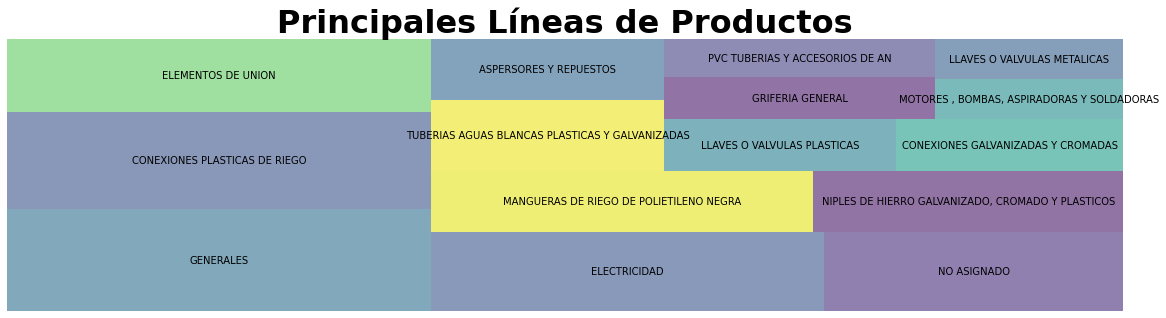

In [40]:
with plt.style.context('tableau-colorblind10'):

    fig, ax = plt.subplots(figsize=(20,5))

    labels = df_linea_top_15['linea']
    sizes = df_linea_top_15['rango']
    squarify.plot(sizes, label=labels, alpha=0.6)

    plt.title('Principales Líneas de Productos',fontsize=32, fontweight='bold') 
    plt.axis('off')
    plt.show()

Estas son las 15 principales líneas de producto (de un total de 34). Son las más importantes porque generan la mayor cantidad de ventas en USD y/o en volumen.

Las líneas:
- Conexiones plásticas de riego
- Mangueras de riego de polietileno
- Aspersores y respuestos
- Motores, bombas, aspiradoras y soldaduras

Incluyen los productos utilizados en los acueductos y sistemas de riego.

Esto confirma que la empresa es vista por los clientes como especialista en esta materia.

In [41]:
df_linea_grafico = df_linea_general.reset_index()

total_dol = df_linea_grafico.monto_dolar.sum()
total_vol = df_linea_grafico.cantidad.sum()

df_linea_grafico['porcent_dolar'] = df_linea_grafico.apply(lambda row: round((row['monto_dolar'] / total_dol), 4), 
                                                           axis = 1)

df_linea_grafico['porcent_vol'] = df_linea_grafico.apply(lambda row: round((row['cantidad'] / total_vol), 4), 
                                                           axis = 1)

In [42]:
df_linea_grafico_dolar = df_linea_grafico.sort_values('monto_dolar', ascending=False).head(10)
df_linea_grafico_volumen = df_linea_grafico.sort_values('cantidad', ascending=False).head(10)

In [43]:
porcentaje = df_linea_grafico_dolar.porcent_dolar.sum()*100
texto = f'Las 10 Líneas que representan el {round(porcentaje, 2)}% de las Ventas en USD son:'

formato_titulo(texto)



Las 10 Líneas que representan el 71.38% de las Ventas en USD son:



In [44]:
theta = alt.Theta("monto_dolar:Q", stack=True)
texto = alt.Text('porcent_dolar:Q', format='.2%')
titulo='Top 10 de la Líneas de Producto Más Vendidas en USD'

graf_sectores_linea(df_linea_grafico_dolar, theta, texto, titulo)



alt.LayerChart(...)

In [45]:
porcentaje = df_linea_grafico_volumen.porcent_vol.sum()*100
texto = f'Las 10 Líneas que representan el {round(porcentaje, 2)}% del Volumen de Ventas:'

formato_titulo(texto)

Las 10 Líneas que representan el 88.92% del Volumen de Ventas:



In [46]:
theta = alt.Theta("cantidad:Q", stack=True)
texto = alt.Text('porcent_vol:Q', format='.2%')
titulo='Top 10 de la Líneas de Producto Más Vendidas en Volumen'

graf_sectores_linea(df_linea_grafico_volumen, theta, texto, titulo)

alt.LayerChart(...)

In [47]:
# Los 5 productos con mayores ventas en $ por cada línea

df_ventas_linea_mont = df_linea.pivot_table(index=['linea', 'producto'],
                                       aggfunc={'monto_dolar':sum})

df_ventas_linea_mont = df_ventas_linea_mont.monto_dolar.groupby('linea', group_keys=False)
df_ventas_linea_mont = df_ventas_linea_mont.nlargest(5)
df_ventas_linea_mont = df_ventas_linea_mont.reset_index()

df_ventas_linea_mont

linea  \
0                                  ALAMBRES Y MALLAS   
1                                  ALAMBRES Y MALLAS   
2                                  ALAMBRES Y MALLAS   
3                                  ALAMBRES Y MALLAS   
4                                  ALAMBRES Y MALLAS   
..                                               ...   
159  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   
160  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   
161  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   
162  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   
163                                          anulada   

                                              producto  monto_dolar  
0              ALAMBRE C-17.5 LISO HG KILOGRAMO VICSON   892.187305  
1            ALAMBRE DE PUAS CALIBRE 16 400 MTRS TREXA   302.372590  
2    ALAMBRE DE PUAS CALIBRE 15.5 METROS 500 IMPORTADO   260.299266  
3    ALAMBRE DE PUAS CALIBRE 15 METROS 500 MOTTO VI...   192.911705  
4    MALLA METALICA GALLINERA  2" *1.65 *30 C-22  (...   147.157644  
..                                                 ...          ...  
159  ANILLO REDUCIDO 3/4"*1/2" PLASTICO ROSCADO BLA...  1256.646569  
160      TUBO PLASTICO 3/4"*6MTS AZUL SHEDULE INPLAVEN  1244.181301  
161      TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN  1229.302186  
162       TUBO PLASTICO 1"*6MTS AZUL SCHEDULE INPLAVEN   731.372797  
163                       CERRADURA CILINDRO FIJO CISA   100.266118  

[164 rows x 3 columns]

In [48]:
# Los 5 productos con mayores volúmenes de venta por cada línea

df_ventas_linea_cant = df_linea.pivot_table(index=['linea', 'producto'],
                                       aggfunc={'cantidad':sum} )

df_ventas_linea_cant = df_ventas_linea_cant.cantidad.groupby('linea', group_keys=False)
df_ventas_linea_cant = df_ventas_linea_cant.nlargest(5)
df_ventas_linea_cant = df_ventas_linea_cant.reset_index()

df_ventas_linea_cant.columns=['Línea', 'Producto', 'Volumen Ventas']

formato_titulo('Los 5 Productos con mayor Volumen de Ventas por Línea de Productos')

prettify(df_ventas_linea_cant, row_limit=200, col_limit=4, delay_time=1)

Los 5 Productos con mayor Volumen de Ventas por Línea de Productos



Output()

In [49]:
df_linea.query('linea=="GENERALES"').sample(15)

fecha    cod                                           producto  \
29743 2021-09-20  06270       CABILLA 7.5mm * 6 MTRS ESTRIADA (POR UNIDAD)   
9965  2021-12-20  06381                                   MAXICAL 10 KILOS   
24405 2021-09-20  03557     PEGA 1/32 118ML CPVC Y PVC AGUA CALIENTE PVSOL   
23914 2021-11-16  01246                     ABRAZADERA METALICA 90MM 115MM   
2945  2021-07-08  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
27160 2021-03-16  00078                                    RESORTES ABC 2"   
3781  2021-07-22  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
21406 2021-12-18  06112            SILICON SELLADOR ANTIHONGOS GRIVEN 80ML   
3655  2021-11-12  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
3725  2021-10-11  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
3028  2021-01-15  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
26549 2021-09-03  04207  BISAGRA GOLPE  2"*1-1/2" DORADA CAL 18CT (EL PAR)   
30424 2021-04-28  04921  SOPORTE 1" RECTO DE ALUMINIO PARA TUBO CORTINE...   
3845  2021-08-10  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   
3689  2021-10-26  00776  BOLSA PLASTICA PEQUEÑA 10KRGS (USO INTERNO) UN...   

       cantidad  monto_dolar      linea  stock fecha_stock  
29743       5.0    14.211260  GENERALES    0.0  2022-03-03  
9965        1.0     5.577253  GENERALES   41.0  2022-03-03  
24405       1.0     6.012456  GENERALES    0.0  2022-03-03  
23914       2.0     4.782895  GENERALES   21.0  2022-03-03  
2945        1.0     0.009563  GENERALES  631.0  2022-03-03  
27160       5.0     2.901707  GENERALES    1.0  2022-03-03  
3781        1.0     0.011110  GENERALES  631.0  2022-03-03  
21406       1.0     1.819355  GENERALES   -1.0  2022-03-03  
3655        3.0     0.033333  GENERALES  631.0  2022-03-03  
3725        1.0     0.010050  GENERALES  631.0  2022-03-03  
3028        1.0     0.013327  GENERALES  631.0  2022-03-03  
26549       1.0     2.819468  GENERALES    8.0  2022-03-03  
30424       2.0     2.080286  GENERALES   61.0  2022-03-03  
3845        1.0     0.009982  GENERALES  631.0  2022-03-03  
3689        1.0     0.009259  GENERALES  631.0  2022-03-03

In [50]:
df_linea.query('linea=="NO ASIGNADO"').sample(15)

fecha    cod                                           producto  \
21174 2021-06-16  03845                                 MAXICAL POR  KILOS   
29756 2021-04-29  03087                  CONFITERIA TRULULU GOMITAS 90 GRS   
26969 2021-04-22  01782    CLAVO ACERO 2 1/2 RANURADO (POR UNIDAD)173 KILO   
11457 2021-09-15  01048                        CLAVO 2*10 ACERO POR UNIDAD   
19555 2021-12-15  00365  DISCO 4 1/2" CORTE EXTRAFINO METAL PRETUL DICO...   
24363 2021-09-21  00482                     ANILLO 1 1/2" PLASTICO ROSCADO   
27994 2021-02-02  00802   TEIPE ELECTRICO 3/4"*10MTS  NEGRO COBRA ORIGINAL   
26622 2021-01-13  00266                              CHOCO CHOCO 40G SAVOY   
9240  2021-08-18  01292                                 YESQUERO UNIVERSAL   
19482 2021-02-26  00365  DISCO 4 1/2" CORTE EXTRAFINO METAL PRETUL DICO...   
26682 2021-02-08  01018                        CONFITERIA HALLS 1 CARAMELO   
31468 2021-07-12  05033                  COLCHON INFLABLE 2 PLAZAS PAVILLO   
19502 2021-02-02  00365  DISCO 4 1/2" CORTE EXTRAFINO METAL PRETUL DICO...   
11451 2021-07-02  01048                        CLAVO 2*10 ACERO POR UNIDAD   
9170  2021-03-15  01292                                 YESQUERO UNIVERSAL   

       cantidad  monto_dolar        linea  stock fecha_stock  
21174       2.0     1.367171  NO ASIGNADO   14.0  2022-03-03  
29756       1.0     0.596888  NO ASIGNADO   12.0  2022-03-03  
26969       8.0     0.371341  NO ASIGNADO    5.0  2022-03-03  
11457      13.0     0.265003  NO ASIGNADO  516.0  2022-03-03  
19555       1.0     1.030043  NO ASIGNADO   30.0  2022-03-03  
24363       1.0     1.130243  NO ASIGNADO    0.0  2022-03-03  
27994       1.0     0.818022  NO ASIGNADO    0.0  2022-03-03  
26622       1.0     0.846990  NO ASIGNADO    0.0  2022-03-03  
9240        1.0     0.277680  NO ASIGNADO   79.0  2022-03-03  
19482       2.0     2.181311  NO ASIGNADO   30.0  2022-03-03  
26682       5.0     0.293274  NO ASIGNADO   73.0  2022-03-03  
31468       1.0    15.119605  NO ASIGNADO    2.0  2022-03-03  
19502       1.0     0.914260  NO ASIGNADO   30.0  2022-03-03  
11451      20.0     0.514306  NO ASIGNADO  516.0  2022-03-03  
9170        1.0     0.311629  NO ASIGNADO   79.0  2022-03-03

Recomendamos verificar las línes *GENERALES* y *NO ASIGNADO* para reclasificar los productos y asignarlos a líneas acordes con el tipo de producto. Esto ayudaría a mejorar la calidad de los datos y su análisis.

## 8. Ventas por Producto<a name="ventas-producto"></a>

### 8.A Productos con Ventas Numerosas<a name="ventas-numerosas"></a>

In [51]:
df_ventas.query('cantidad == cantidad.max()')

num          fecha_comp  vendedor  monto tipo    cod  \
38952  2021-0000002825-ne 2021-09-20 14:23:00         1  580.0   ne  02794   

                                              producto  cantidad      fecha  \
38952  ARANDELA PLANA 3/8" NACIONAL TANQUE AUSTRALIANO    2000.0 2021-09-20   

       tasa_dolar  monto_dolar  
38952    3.750547   154.644107

In [52]:
df_cantidad = pd.DataFrame(df_ventas.query(' fecha > "2020-12-31" ').cantidad.value_counts())

df_cantidad.reset_index(inplace=True)
df_cantidad.columns = ['cantidad', 'count']
df_cantidad.head(15)

cantidad  count
0        1.0  18398
1        2.0   4794
2        3.0   1729
3        4.0   1494
4        5.0   1038
5       10.0    768
6        6.0    691
7        8.0    390
8       20.0    309
9        7.0    274
10      15.0    273
11      12.0    259
12      30.0    198
13       0.5    158
14      50.0    104

In [53]:
df_cantidad.describe()

cantidad         count
count   245.000000    245.000000
mean     63.163633    132.624490
std     176.591109   1223.281983
min       0.020000      1.000000
25%       1.110000      1.000000
50%       7.250000      2.000000
75%      58.000000      5.000000
max    2000.000000  18398.000000

<AxesSubplot:xlabel='cantidad', ylabel='Density'>

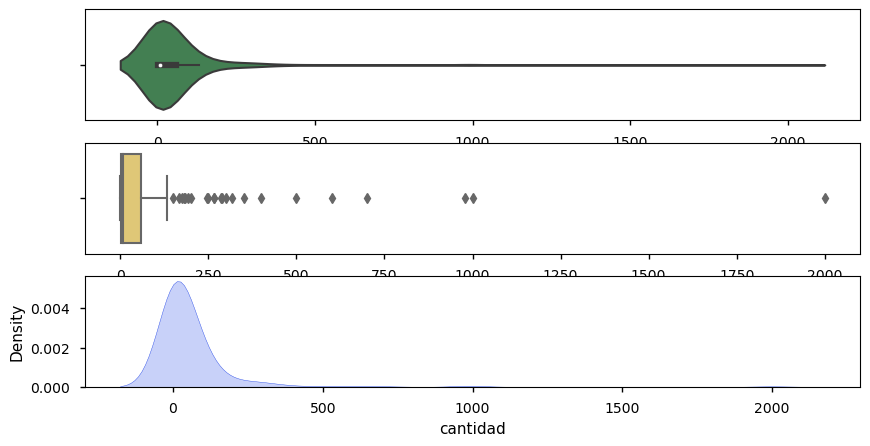

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=100, figsize=(10,5))

sns.violinplot(x='cantidad', data=df_cantidad, color=VERDE, ax=ax1)
sns.boxplot(x='cantidad', data=df_cantidad, color=AMARILLO, ax=ax2)
sns.kdeplot(x='cantidad', data=df_cantidad, color=AZUL, shade=True, ax=ax3)

In [55]:
df_ventas.query('cantidad > 250').describe()

vendedor        monto     cantidad  tasa_dolar  monto_dolar
count  22.000000    22.000000    22.000000   22.000000    22.000000
mean    8.363636   172.943636   561.500000    3.519502    49.718545
std     4.359395   275.017403   403.165185    1.123958    73.101112
min     1.000000     6.320000   265.000000    1.385879     1.362069
25%     7.000000    36.345000   300.000000    3.006972    11.598392
50%    10.000000    63.175000   400.000000    3.841367    17.702656
75%    11.000000   176.040000   675.000000    4.365000    52.706826
max    14.000000  1205.400000  2000.000000    4.800000   321.393115

1. Para la gran mayoría de productos, sólo se vente una unidad
1. En el 75% de las ventas, se venden menos de 7 unidades de un producto
1. Sólo existen 22 ventas en donde la cantidad de producto vendido es mayor a 250 unidades
1. Existe una venta excepcional donde se vendieron 2.000 unidades de arandelas para tanque australiano

### 8.B Productos sin Ventas<a name="prod-sin-ventas"></a>

In [56]:
# Productos sin ventas
filtro = df_ventas_linea_prod['cantidad'].isna() & df_ventas_linea_prod['stock'] > 0

df_ventas_linea_prod[filtro][ ['linea', 'cod', 'producto', 'stock'] ].sort_values('stock', ascending=False)

linea    cod  \
32755                 ASPERSORES Y REPUESTOS  00844   
32756                 ASPERSORES Y REPUESTOS  00845   
33149                     ELEMENTOS DE UNION  03466   
32758  MANGUERAS GENERALES NO DE POLIETILENO  00847   
33599                     ELEMENTOS DE UNION  05608   
...                                      ...    ...   
33371                              GENERALES  04585   
32857                           ELECTRICIDAD  01198   
33135                    SEGURIDAD & HIGIENE  03255   
33020                              GENERALES  01787   
32566                     ELEMENTOS DE UNION  00199   

                                                producto    stock  
32755        R. ACOPLE RAB DOBLE BAJO PARA MICROASPERSOR  8045.00  
32756         R. ACOPLE RAB LISO ALTO PARA MICROASPERSOR  7600.00  
33149                         TORNILLO DRYWALL Nº 6 * 1"  3465.00  
32758  MANGUERA 7MM PARA MICROASPERSOR POR METRO/ROLL...  1883.00  
33599             TORNILLO 10*2 1/2" AUTOROSCANTE ESTRIA   500.00  
...                                                  ...      ...  
33371         R. PRESOTATO PARA COMPRESOR 15-40 PSI SACO     1.00  
32857            PROTECTOR DE LAVADORA XYS PROTECTOR 128     1.00  
33135           BOTAS #38 DE CAUCHO CAÑA CORTA BEIGE SEA     1.00  
33020  TUBO PLASTICO 2 1/2"*6 MTS SCHEDULE 80 AZUL UR...     0.98  
32566                         BARRA ROSCADA 1/2" * 2 MTS     0.60  

[966 rows x 4 columns]

Existen casi 1.000 productos en existencia y sin ventas.
 
Para algunos es normal ya que se trata de productos relativamente nuevos. Es necesario cruzar la información con la última fecha de entrada en stock (por el momento, no presente en los datos estudiados) para determinar realmente los productos que no se venden.

Una vez identificados estos productos, es necesario idear estrategias para venderlos: Promociones, rifas, etc.

Además, deberán ser identificados para no adquirirlos de nuevo.

### 8.C Productos más Vendidos<a name="prod-mas-vendidos"></a>

In [57]:
df_ventas_prod = df_ventas_linea_prod.copy()
df_ventas_prod.sample(5)

fecha    cod                                           producto  \
1461  2021-01-29  00233  SOLDADURA 3/32 FINA AZUL WEST ARCO KILO(60VARI...   
25468 2021-03-01  00696  PVC ANILLO REDUCIDO 75MM/3"X50MM/2" "TIPO A" A...   
12013 2021-07-30  03876          RIEGO ADAPTADOR HEMBRA 40MM * 1" AGRO/MOM   
11492 2021-04-27  01101                     RAMPLUG PLASTICO VERDE 3"*1/4"   
22886 2021-04-12  05103                  CONFITERIA PAPAS FRITAS MARGARITA   

       cantidad  monto_dolar                            linea   stock  \
1461       58.0     5.738901                        GENERALES  4693.0   
25468       2.0     1.290960  PVC TUBERIAS Y ACCESORIOS DE AN   128.0   
12013       1.0     1.419324    CONEXIONES PLASTICAS DE RIEGO    33.0   
11492       1.0     0.025992               ELEMENTOS DE UNION   340.0   
22886       2.0     1.366708                      NO ASIGNADO     5.0   

      fecha_stock  
1461   2022-03-03  
25468  2022-03-03  
12013  2022-03-03  
11492  2022-03-03  
22886  2022-03-03

In [58]:
# Por cada línea de producto: Ventas en volumen (cantidad), N° de productos (producto) 
# y total de Ventas en $ (monto_dolar)
df_prod_general = df_ventas_prod.pivot_table(index=['cod', 'producto'],
                                        aggfunc={'monto_dolar':sum,
                                                 'cantidad':sum})
# Definimos la columna rango para seleccionar las 15 líneas con más ventas en $ y/o volumen
df_prod_general['rango'] = df_prod_general.cantidad + df_prod_general.monto_dolar

df_prod_general.cantidad = round(df_prod_general.cantidad, 2)
df_prod_general.monto_dolar = round(df_prod_general.monto_dolar, 2)

df_prod_general.columns=['Volumen Ventas', 'Ventas en $', 'rango']

df_prod_general = df_prod_general.sort_values(['rango'], ascending=False)

formato_titulo('Productos más Vendidos por Volumen de Ventas y/o Ventas en $')

table = prettify(df_prod_general, row_limit=100, col_limit=4, delay_time=1)

Productos más Vendidos por Volumen de Ventas y/o Ventas en $



Output()

### 8.D Productos Indispensables<a name="prod-indispensables"></a>

Se trata de aquellos productos que se venden regularmente. Podría haber algunos meses sin ventas debido a una rotura de stock o que sean productos recientemente incorporados.

In [104]:
df_ventas_prod['mes_año'] = df_ventas_prod.fecha.dt.strftime('%m-%Y')

In [118]:
df_ventas_prod_mes = df_ventas_prod.pivot_table(index='cod',
                                               columns='mes_año',
                                               fill_value=0,
                                               aggfunc={'cantidad':sum})

df_ventas_prod_mes['total_ventas'] = df_ventas_prod_mes.sum(axis = 1)
df_ventas_prod_mes

cantidad                                                          \
mes_año  01-2021 01-2022 02-2021 02-2022 03-2021 04-2021 05-2021 06-2021   
cod                                                                        
00001        3.0     6.0     3.0     1.0     3.0     5.0    3.00     2.0   
00005        0.0   111.0     7.0    36.0    59.0    54.0   14.00    23.0   
00006        0.0     0.0     0.0     0.0     0.0     1.0    0.00     1.0   
00007        1.0     0.0     0.0     0.0     0.0     0.0    0.00     0.0   
00008        6.0    42.0     4.0    12.0     1.0     1.0    7.25    21.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
06382        0.0    20.0     0.0    11.0     0.0     0.0    0.00     0.0   
06383        0.0     1.0     0.0     1.0     0.0     0.0    0.00     0.0   
06385        0.0     0.0     0.0     3.0     0.0     0.0    0.00     0.0   
GEN1        63.0    20.0     5.0     8.0    10.0     1.0    0.00     4.0   
GEN2         0.0     0.0     0.0     1.0     0.0     1.0    1.00     2.0   

                                                        total_ventas  
mes_año 07-2021 08-2021 09-2021 10-2021 11-2021 12-2021               
cod                                                                   
00001      0.00     2.0     4.0     1.0     6.0     6.0        45.00  
00005     59.00    34.0    72.0    40.0    20.0    44.0       573.00  
00006      0.00     0.0     1.0     1.0     0.0     0.0         4.00  
00007      0.00     0.0     0.0     0.0     0.0     0.0         1.00  
00008     20.00    28.0    35.0    10.0    20.0    11.0       218.25  
...         ...     ...     ...     ...     ...     ...          ...  
06382      0.00     0.0     0.0     0.0     0.0     0.0        31.00  
06383      0.00     0.0     0.0     0.0     0.0     1.0         3.00  
06385      0.00     0.0     0.0     0.0     0.0     0.0         3.00  
GEN1       6.68     3.0     7.0     1.0     5.0     8.0       141.68  
GEN2       1.00     0.0     2.0     2.0     0.0     0.0        10.00  

[2574 rows x 15 columns]

In [119]:
# Calculamos cuantos meses del período cada producto tuvo ventas
# Difinimos como un producto indispensable aquel que tiene ventas regulares
# por ejemplo el 75% de los meses del período

def calculo_mes_con_ventas(row):
    # -1 para descontar la columna total_ventas
    total = -1
    
    for column in row: 
        if column:
            total = total + 1
    
    return total

df_ventas_prod_mes['mes_ventas'] = df_ventas_prod_mes.apply(lambda row: calculo_mes_con_ventas(row), 
                                              axis = 1)

min_meses = df_ventas_prod['mes_año'].nunique() * .75

df_ventas_prod_mes = df_ventas_prod_mes[ df_ventas_prod_mes['mes_ventas'] > min_meses ]

df_ventas_prod_mes

cantidad                                                          \
mes_año  01-2021 01-2022 02-2021 02-2022 03-2021 04-2021 05-2021 06-2021   
cod                                                                        
00001        3.0     6.0     3.0    1.00     3.0    5.00    3.00     2.0   
00005        0.0   111.0     7.0   36.00    59.0   54.00   14.00    23.0   
00008        6.0    42.0     4.0   12.00     1.0    1.00    7.25    21.0   
00010        8.0     6.0    10.0    2.00     8.0    9.00    8.00     1.0   
00012       48.0    33.0    50.0    5.00     1.0   12.00    1.00    17.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
06196        2.0    22.0    16.0   11.00     6.0   12.00   14.00     7.0   
06300       16.0     3.0     0.0   14.00     3.0    0.00   20.00     4.0   
06306        0.0    43.0   100.0   14.00   111.0  197.00    8.00     7.0   
06315        0.0     8.5     0.0    7.08    15.0    3.33    8.50    11.0   
GEN1        63.0    20.0     5.0    8.00    10.0    1.00    0.00     4.0   

                                                        total_ventas  \
mes_año 07-2021 08-2021 09-2021 10-2021 11-2021 12-2021                
cod                                                                    
00001      0.00    2.00     4.0     1.0     6.0    6.00        45.00   
00005     59.00   34.00    72.0    40.0    20.0   44.00       573.00   
00008     20.00   28.00    35.0    10.0    20.0   11.00       218.25   
00010      5.00    2.00     4.0     0.0     3.0    3.00        69.00   
00012      7.00   25.00    18.0     5.0    33.0   10.00       265.00   
...         ...     ...     ...     ...     ...     ...          ...   
06196     13.00   24.00     2.0     6.0     8.0   24.00       167.00   
06300     29.00    1.00     1.0    20.0    14.0    6.00       131.00   
06306     15.00    4.00     3.0    12.0     3.0    5.00       522.00   
06315     15.00    5.33     9.0     3.0    10.5    5.79       102.03   
GEN1       6.68    3.00     7.0     1.0     5.0    8.00       141.68   

        mes_ventas  
mes_año             
cod                 
00001           13  
00005           13  
00008           14  
00010           13  
00012           14  
...            ...  
06196           14  
06300           12  
06306           13  
06315           12  
GEN1            13  

[238 rows x 16 columns]

In [121]:
df_promed_ventas_prod = df_ventas_prod_mes.total_ventas/df_ventas_prod_mes.mes_ventas
df_promed_ventas_prod = df_promed_ventas_prod.reset_index()
df_promed_ventas_prod.columns=['cod', 'promedio']
df_promed_ventas_prod.promedio = round(df_promed_ventas_prod.promedio)

df_promed_ventas_prod

cod  promedio
0    00001       3.0
1    00005      44.0
2    00008      16.0
3    00010       5.0
4    00012      19.0
..     ...       ...
233  06196      12.0
234  06300      11.0
235  06306      40.0
236  06315       9.0
237   GEN1      11.0

[238 rows x 2 columns]

In [122]:
df_indispensables = df_stock[df_stock.cod.isin(df_ventas_prod_mes.index)]
df_indispensables = pd.merge(df_indispensables, df_promed_ventas_prod, on='cod')
df_indispensables.set_index('cod', inplace=True)

df_indispensables_print = df_indispensables.copy()
df_indispensables_print.columns = ['Producto', 'Línea', 'Stock', 'Fecha Stock', 'Promedio Ventas']

# Lo guardamos en un archivo .xlsx para estudio detallado
df_indispensables_print.to_excel(f"{BASE_DIR / 'datos/out/productos_indispensables.xlsx'}")

# Impresión de la tabla
formato_titulo('Lista de Productos Indispensables')
prettify(df_indispensables_print, row_limit=100, col_limit=6, delay_time=1)

Lista de Productos Indispensables



Output()

#### Productos indispensables con sus ventas por mes, promedio de ventas mensual y stock
Datos para ser utilizados más adelante en reportes y predicciones

In [123]:
df_indispensables_mes = df_ventas_prod.pivot_table(index={'cod', 'mes_año'},
                                               fill_value=0,
                                               aggfunc={'cantidad':sum, 'monto_dolar':sum})
df_indispensables_mes.reset_index(inplace=True)
df_indispensables_mes.mes_año = pd.to_datetime(df_indispensables_mes.mes_año)
df_indispensables_mes

cod    mes_año  cantidad  monto_dolar
0      00001 2021-01-01       3.0     4.975278
1      00001 2022-01-01       6.0    12.329562
2      00001 2021-02-01       3.0     5.840414
3      00001 2022-02-01       1.0     1.823529
4      00001 2021-03-01       3.0     5.736321
...      ...        ...       ...          ...
11379   GEN2 2021-05-01       1.0     4.062823
11380   GEN2 2021-06-01       2.0     3.399665
11381   GEN2 2021-07-01       1.0   114.363427
11382   GEN2 2021-09-01       2.0    59.195279
11383   GEN2 2021-10-01       2.0    12.315522

[11384 rows x 4 columns]

In [124]:
df_indispensables_mes = pd.merge(df_indispensables, df_indispensables_mes, on='cod')
df_indispensables_mes

cod                                         producto  \
0     00001  PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
1     00001  PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
2     00001  PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
3     00001  PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
4     00001  PEGA DE CONTACTO/PEGA ZAPATERA (90 ML) ENVASADO   
...     ...                                              ...   
2994  06315    TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN   
2995  06315    TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN   
2996  06315    TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN   
2997  06315    TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN   
2998  06315    TUBO PLASTICO 1/2"*6MTS AZUL SHEDULE INPLAVEN   

                                                linea  stock fecha_stock  \
0                                           GENERALES   15.5  2022-03-03   
1                                           GENERALES   15.5  2022-03-03   
2                                           GENERALES   15.5  2022-03-03   
3                                           GENERALES   15.5  2022-03-03   
4                                           GENERALES   15.5  2022-03-03   
...                                               ...    ...         ...   
2994  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   67.5  2022-03-03   
2995  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   67.5  2022-03-03   
2996  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   67.5  2022-03-03   
2997  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   67.5  2022-03-03   
2998  TUBERIAS AGUAS BLANCAS PLASTICAS Y GALVANIZADAS   67.5  2022-03-03   

      promedio    mes_año  cantidad  monto_dolar  
0          3.0 2021-01-01      3.00     4.975278  
1          3.0 2022-01-01      6.00    12.329562  
2          3.0 2021-02-01      3.00     5.840414  
3          3.0 2022-02-01      1.00     1.823529  
4          3.0 2021-03-01      3.00     5.736321  
...        ...        ...       ...          ...  
2994       9.0 2021-08-01      5.33    61.979403  
2995       9.0 2021-09-01      9.00   106.689043  
2996       9.0 2021-10-01      3.00    44.782570  
2997       9.0 2021-11-01     10.50   139.094444  
2998       9.0 2021-12-01      5.79    80.065172  

[2999 rows x 9 columns]

In [125]:
%%time
# Guardamos el DF limpio para su análisis posterior

df_indispensables_mes.to_parquet(f"{BASE_DIR / 'datos/out/productos_indispensables_mes.parquet'}", 
                    compression='GZIP',
                    engine='pyarrow')

df_indispensables_mes.to_csv(f"{BASE_DIR / 'datos/out/productos_indispensables_mes.csv'}", sep=';', index = False)


# Guardamos el DF en un archivo Excel para utilizar los datos en Google Data Studio
df_indispensables_mes.to_excel(f"{BASE_DIR / 'datos/out/productos_indispensables_mes.xlsx'}", index = False)

CPU times: user 902 ms, sys: 15.6 ms, total: 918 ms
Wall time: 1.02 s


### 8.E Productos con Posible Rotura de Stock<a name="rotura-stock"></a> 

In [64]:
# Productos que podrían entrar en rotura de stock al ser
# el promedio de ventas mensual mayor a la cantidad en stock

df_rotura = df_indispensables.query(' stock < promedio ')
df_rotura['faltan'] = df_rotura.promedio - df_rotura.stock
df_rotura = df_rotura.sort_values('faltan', ascending=False)

df_rotura_print = df_rotura.copy()
df_rotura_print.columns = ['Producto', 'Línea', 'Stock', 'Fecha Stock', 'Promedio Ventas', 'Faltante']

# Lo guardamos en un archivo .xlsx para estudio detallado
df_rotura_print.to_excel(f"{BASE_DIR / 'datos/out/productos_roptura_stock.xlsx'}")

# Impresión de la tabla
formato_titulo('Cantidad de Productos que podrían entrar en Rotura de Stock:')
print(df_rotura.producto.count())

prettify(df_rotura_print, row_limit=100, col_limit=7, delay_time=1)

Cantidad de Productos que podrían entrar en Rotura de Stock:

37


/home/diana/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Output()

Definir e identificar los **Productos Indispensables** y su posible rotura de stock es de gran utilidad para la optimización del proceso de compras, pues permite:

1. Saber exactamente cuáles son los productos que no pueden faltar porque se venden regularmente
1. Poder estimar el presupuesto para las compras conociendo los productos que no pueden faltar y que están próximos a entrar en rotura de stock
1. Conocer con antelación los productos que debemos comprar para analizar y seleccionar con antelación el mejor proveedor
1. Anticipar compras para evitar roturas de stock

## 9. Afluencia de Clientes<a name="afluencia-cl"></a>

Usamos el número de facturas por día de la semana para determinar los días en que hay mayor cantidad de clientes. 

Aunque no todas las personas que entran a la tienda compran, contar el número de ventas (facturas) puede dar una idea del tráfico o cantidad de clientes en un día y hora dados.

In [65]:
# Utilizamos nunique para contabilizar sólo una vez cada referencia de factura
# Descomponemos la fecha

df_n_fact = df_ventas.loc[:,['fecha_comp', 'fecha', 'num']]

df_n_fact['dia_semana'] = df_n_fact.fecha_comp.dt.weekday
df_n_fact['dia_mes'] = df_n_fact.fecha_comp.dt.day

df_n_fact['hora'] = df_n_fact.fecha_comp.dt.hour

df_n_fact.sample(5)

fecha_comp      fecha                 num  dia_semana  dia_mes  \
13450 2022-01-05 16:35:00 2022-01-05  2022-0000006182-ne           2        5   
13138 2022-01-20 14:31:00 2022-01-20  2022-0000006815-ne           3       20   
12647 2022-01-04 16:00:00 2022-01-04  2022-0000006132-ne           1        4   
26160 2021-07-15 10:45:00 2021-07-15  2021-0000000732-ne           3       15   
12999 2022-01-27 11:20:00 2022-01-27  2022-0000007138-ne           3       27   

       hora  
13450    16  
13138    14  
12647    16  
26160    10  
12999    11

In [66]:
df_n_fact_fecha = df_n_fact.groupby('fecha').num.nunique().reset_index()
df_n_fact_fecha.sample(5)

fecha  num
541 2021-12-02   38
532 2021-11-22   36
260 2020-12-22   44
148 2020-07-29   43
450 2021-08-16   42

In [67]:
x=alt.X('yearmonth(fecha):T', title='Mes y Año', axis = alt.Axis(labelAngle=0, labelFontSize=14))
y=alt.Y('sum(num):Q', title = 'N° Facturas', scale=alt.Scale(zero=False), 
                  axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10))
tooltip=[alt.Tooltip('yearmonth(fecha):T', title='Mes y Año'),
         alt.Tooltip('sum(num):Q', title='N° Facturas', format=',.5')]
titulo='N° Facturas por Mes'

barras = alt.Chart(df_n_fact_fecha).mark_bar().encode(
                x=x,
                y=y,
                color=alt.Color(
                    'sum(num):Q', scale=alt.Scale(scheme='yelloworangebrown'),
                    legend=alt.Legend(title='N° Facturas')),
                tooltip=tooltip,
                ).properties(title=titulo,
                         width=800, 
                         height=300
                )

textos = barras.mark_text(dx=15, dy=-10, fill='black').encode(
         text = alt.Text('sum(num):Q', format=',.5', title = 'N° Facturas')
                )

grafico_final = barras + textos
grafico_final

alt.LayerChart(...)

1. Confirmamos que en general las ventas (n° de facturas) en el 2020 fueron menores con respecto al 2021 y lo que va del 2022
1. Enero del 2022 tuvo la mayor cantidad de ventas del período y febrero 2022 tuvo la 3ra. Obviamente este número de ventas se refleja en el monto en USD elevado para estos 2 meses
1. En genera, la afluencia de clientes o n° de facturas aumenta en enero. Entre marzo y junio es cuando se registra la menor afluencia. El 2do semestre suele ser más concurrido

In [68]:
alt.data_transformers.disable_max_rows()

mapa = alt.Chart(df_n_fact).mark_rect().encode(
                x=alt.X('dia_mes:O', title='Días del mes', axis = alt.Axis(labelAngle=0, labelFontSize=14)),
                y=alt.Y('yearmonth(fecha):T', title = 'Mes y Año', scale=alt.Scale(zero=False), 
                  axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10)),
                color=alt.Color(
                    'distinct(num):Q', scale=alt.Scale(scheme='yelloworangebrown'), legend=alt.Legend(title="N° de Facturas")),
                tooltip=[
                    alt.Tooltip('dia_mes:O', title='Día'),
                    alt.Tooltip('yearmonth(fecha):T', title='Mes y Año'),
                    alt.Tooltip('distinct(num):Q', format=',.5', title='N° de Facturas')]
                ).properties(title='N° de Facturas por Día del Mes',
                             width=800, 
                             height=300
                ).configure_title(
                    fontSize = 16,
                    anchor = 'middle',
                ).interactive()

mapa

alt.Chart(...)

### 9.A Afluencia de Clientes por Día de la Semana<a name="afluencia-cl-dia"></a>

In [69]:
# Sólo las ventas en los días de semana
df_cl_fecha_semana = df_n_fact.query('dia_semana < 5').groupby('fecha').num.nunique()
df_cl_fecha_semana.describe()

count    537.000000
mean      44.975791
std       11.234499
min        5.000000
25%       38.000000
50%       45.000000
75%       52.000000
max       89.000000
Name: num, dtype: float64

In [70]:
# Sólo las ventas los sábados
df_cl_fecha_we = df_n_fact.query('dia_semana == 5').groupby('fecha').num.nunique()
df_cl_fecha_we.describe()

count    63.000000
mean     24.174603
std       9.417793
min       1.000000
25%      18.000000
50%      24.000000
75%      31.000000
max      42.000000
Name: num, dtype: float64

In [71]:
# N° de facturas para cada día de la semana
df_cl_dias = df_n_fact.pivot_table('num', index='dia_semana', aggfunc={'num':'nunique' }) 
df_cl_dias = df_cl_dias.reset_index()

Text(0.5, 0, 'Día de la Semana')

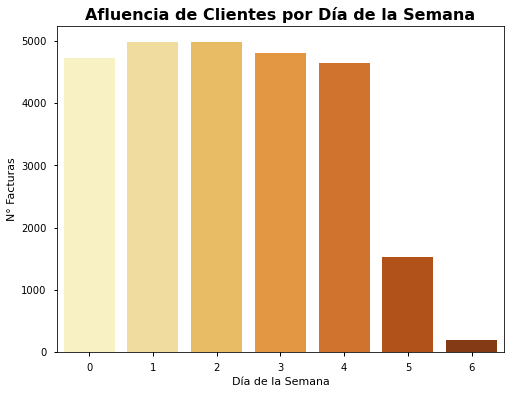

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_cl_dias, x='dia_semana', y='num', palette='YlOrBr')

ax.set_title('Afluencia de Clientes por Día de la Semana', fontsize=16, weight='bold')
ax.set_ylabel('N° Facturas')
ax.set_xlabel('Día de la Semana')

### 9.B Afluencia de Clientes por Hora<a name="afluencia-cl-hora"></a>

In [73]:
# Horas de más afluencia
df_cl_hora = df_n_fact.pivot_table('num', index='hora', aggfunc={'num':'nunique' }) 
df_cl_hora = df_cl_hora.reset_index()

Text(0.5, 0, 'Hora del Día')

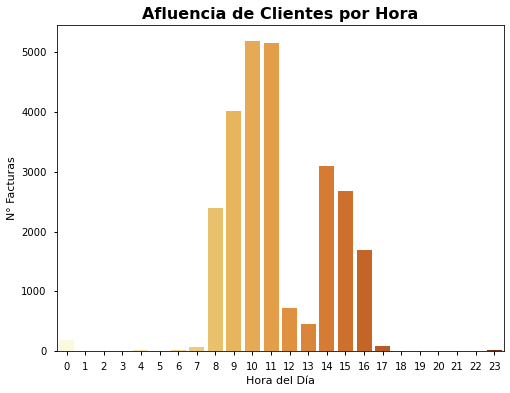

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_cl_hora, x='hora', y='num', palette='YlOrBr')

ax.set_title('Afluencia de Clientes por Hora', fontsize=16, weight='bold')
ax.set_ylabel('N° Facturas')
ax.set_xlabel('Hora del Día')

In [75]:
# Horas de más afluencia entre semana

df_cl_hora_sin_we = df_n_fact.query('dia_semana < 5')

df_cl_hora_sin_we = df_cl_hora_sin_we.pivot_table('num', index='hora', aggfunc={'num':'nunique' }) 
df_cl_hora_sin_we = df_cl_hora_sin_we.reset_index()

Text(0.5, 0, 'Hora del Día')

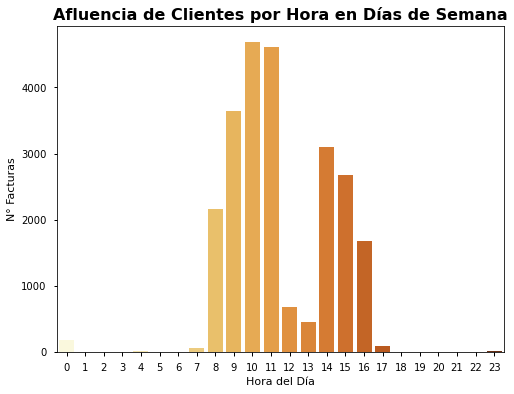

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_cl_hora_sin_we, x='hora', y='num', palette='YlOrBr')

ax.set_title('Afluencia de Clientes por Hora en Días de Semana', fontsize=16, weight='bold')
ax.set_ylabel('N° Facturas')
ax.set_xlabel('Hora del Día')

1. En promedio, se hacen 42 ventas al día (número de facturas): 44 en días de semana y 24 los fines de semana. Aproximadamente 6 facturas por hora (42 / 7 por las 7 horas que abre la tienda cada día)
2. Martes y miércoles son los días de mayor afluencia de clientes, seguido del lunes
3. A partir del jueves, la afluencia disminuye, en particular el fin de semana
4. Las horas de mayor afluencia son entre las 10am y las 12pm, y en la tarde de 2pm a 3pm

**Es recomendable garantizar la presencia y disponibilidad de todo el personal los martes y miércoles y en particular todos los días de 10am a 12pm**